# $\color{black}{}$
### 1. Fitting data
---

### Input data

In [4]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('https://milliams.com/courses/applied_data_analysis/linear.csv')
data.head()

,x,y
0,3.745401,3.229269
1,9.507143,14.185654
2,7.319939,9.524231
3,5.986585,6.672066
4,1.560186,-3.358149


Let's check how many rows we have

In [2]:
data.count()

x    50
y    50
dtype: int64

We have 50 rows here. In the input data, each row is often called a sample (though sometimes also called an instance, example or observation). For example, it could be the information about a single person from a census or the measurements at a particular time from a weather station.

Let's have a look at what the data looks like when plotted

<AxesSubplot:xlabel='x', ylabel='y'>

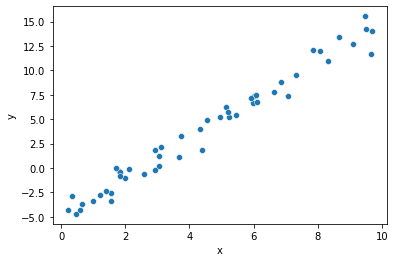

In [5]:
sns.scatterplot(data=data, x="x", y="y")

We can clearly visually see here that there is a linear relationship between the x and y values but we need to be able to extract the exact parameters programmatically.

### Setting up our model

We import the model and create an instance of it. By default the LinearRegression model will fit the y-intercept, but since we don't want to make that assumption we explicitly pass fit_intercept=True. fit_intercept is an example of a hyperparameter, which are variables or options in a model which you set up-front rather than letting them be learned from the data.

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

### Fitting the data

Once we have created our model, we can fit it to the data by calling the `fit()` method on it. This takes two arguments:

1. The input data as a two-dimensional structure of the size ($N_{samples}$,$N_{features}$)

2. The labels or targets of the data as a one-dimensional data structure of size ($N_{samples}$)


If we just request `data["x"]` then that will be a 1D array (actually a pandas `Series`) of shape (50) so we must request the data with `data[["x"]]` (which returns it as a single-column, but still two-dimensional, `DataFrame`).

If you're using pandas to store your data (as we are) then just remember that the first argument should be a `DataFrame` and the second should be a `Series`.

In [6]:
X = data[['x']]
y = data['y']

In [9]:
model.fit(X, y)

LinearRegression()

### Making predictions using the model

We can use this to plot the fit over the original data to compare the result. By getting the predicted *__y__* values for the minimum and maximum x values, we can plot a straight line between them to visualise the model.

The `predict()` function takes an array of the same shape as the original input data (($N_{samples}$, $N_{features}$)) so we put our list of *__x__* values into a `DataFrame` before passing it to `predict()`.

We then plot the original data in the same way as before and draw the prediction line in the same plot.

In [10]:
x_fit = pd.DataFrame({'x': [0, 10]})
y_pred = model.predict(x_fit)

<Figure size 1440x1440 with 0 Axes>

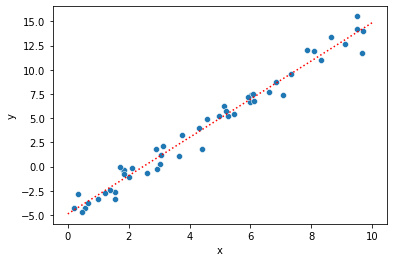

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

fig, ax = plt.subplots()
sns.scatterplot(data=data, x='x', y='y', ax=ax)
ax.plot(x_fit['x'], y_pred, linestyle=':', color='red')
plt.show()

As well as plotting the line in a graph, we can also extract the calculated values of the gradient and y-intercept. The gradient is available as a list of values, `model.coef_`, one for each dimension or feature. The intercept is available as `model.intercept_`.

In [14]:
print(f'Model gradient: {model.coef_[0]}')
print(f'Model intercept: {model.intercept_}')

Model gradient: 1.9776566003853107
Model intercept: -4.903310725531115


The equation that we have extracted can therefore be represented as:
                                __$y = 1.97x - 4.90$__

The original data was produced (with random wobble applied) from a straight line with gradient __$2$__ and y-intercept of __$−5$__. Our model has managed to predict values very close to the original.